<a href="https://colab.research.google.com/github/john-decker/Dutch_Colonial_Research/blob/main/Scripts/Colonist_Simple_Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Analysis and Visualization
This notebook demonstrates some approaches for performing simple data exploration, rudimentary cleaning tasks (e.g. dealing with null values that might cause downstream issues), initial analysis tasks, and basic data visualization.

In [1]:
#add functionality needed for using the pandas library
import pandas as pd


##Using Pandas

The Pandas library was created to enable complex data analysis. Currently, it is the go-to tool for Data Scientists thanks to its speed and flexibility. Pandas is useful for cleaning data, exploring data, analyzing data, outputting data to other applications (such as machine learning), and visualizing data. The library is built on the NumPy library, which is written in a combination of Python and C++. NumPy is optimized for fast calculation of sequential data, which makes it well-suited to scientific/mathematical tasks.

Pandas allows us to work efficiently with series data (one-dimensional array data) as well as data frame data (two dimensional array data). The library has built-in functionality that allows us to shape, group, subset, and merge data. We can also work with the data using high-level math packages and can carry out various types of statistical analysis with tools built-in to Pandas.

Because we can work with our data programmatically, we have a great deal of flexibility in how we move through various stages: initial exploration, cleaning and organization, analysis, modeling, and output (graphs, tables, etc.). The scripts that we create to produce results, can be shared with others who can apply them to the same data and reproduce our findings, which helps validate the claims we make about the data we are analyzing.

###Loading files
Colab provides a built-in system for importing files. The file folder icon to the left will open the file managment window. The file icon with an upward pointing arrow will open a file chooser that will allow you to select the files needed for analysis.

In [2]:
#assign variables to the file paths for the files we want to analyze further
person_path = '/content/person_all.csv'
person_session_path = '/content/Person_to_Session.csv'
defendant_path = '/content/defendants.csv'

Pandas has a built in method for reading .csv files, which makes importing them easy. We can turn the files we have into a Pandas Data Frame and perform our analyses.

First, we will read in the file and then we will use the ```.head()``` method to see the first few rows of the Data Frame.

In [3]:
person_df = pd.read_csv(person_path)

person_df. head()

,personid,fname,lname,gender,ethnicity,status
0,1,NaN,Delavall,M,European,Military or Civic Officer
1,2,Severyn,Ten Houdt,M,European,Colonist
2,3,Lowies (Louys),DuBooys (Dubois),M,European,Colonist
3,4,Matthias,Blansjan,M,European,Colonist
4,5,Jan,Fortune,M,European,Attorney


In [4]:
defendant_df = pd.read_csv(defendant_path)

defendant_df. head()

,fname,lname,gender,ethnicity,status,role,action,amount
0,Severyn,Ten Houdt,M,European,Colonist,"defendant, criminal",Fine,6 Sch. Wheat per defendant
1,Lowies (Louys),DuBooys (Dubois),M,European,Colonist,"defendant, criminal",Fine,6 Sch. Wheat per defendant
2,Matthias,Blansjan,M,European,Colonist,"defendant, criminal",Fine,6 Sch. Wheat per defendant
3,Leendert,Cool,M,European,Colonist,"respondent, civil",Fine,"28 Sch. Wheat, plus costs"
4,Dirck,Jansen,M,European,Colonist,"respondent, civil",Attempt to resolve payment dispute,NaN


##Dealing with NaN
In Pandas, NaN means "not a number" and is how Pandas handles the None type (which is an absence of value). It is advisable to handle this so that further processing is not affected. A good way of doing this is to use the ```.fillna()``` method.

In [5]:
person_no_nulls_df = person_df.fillna(" ") #for names, we will use a blank space

person_no_nulls_df.head()

,personid,fname,lname,gender,ethnicity,status
0,1,,Delavall,M,European,Military or Civic Officer
1,2,Severyn,Ten Houdt,M,European,Colonist
2,3,Lowies (Louys),DuBooys (Dubois),M,European,Colonist
3,4,Matthias,Blansjan,M,European,Colonist
4,5,Jan,Fortune,M,European,Attorney


In [6]:
defendant_no_nulls_df = defendant_df.fillna("None") #for amount, we will use the word None
defendant_no_nulls_df.head()

,fname,lname,gender,ethnicity,status,role,action,amount
0,Severyn,Ten Houdt,M,European,Colonist,"defendant, criminal",Fine,6 Sch. Wheat per defendant
1,Lowies (Louys),DuBooys (Dubois),M,European,Colonist,"defendant, criminal",Fine,6 Sch. Wheat per defendant
2,Matthias,Blansjan,M,European,Colonist,"defendant, criminal",Fine,6 Sch. Wheat per defendant
3,Leendert,Cool,M,European,Colonist,"respondent, civil",Fine,"28 Sch. Wheat, plus costs"
4,Dirck,Jansen,M,European,Colonist,"respondent, civil",Attempt to resolve payment dispute,None


Now that we've dealt with the presence of null values, let's take a look at the remaining sheet.

In [7]:
person_session_df = pd.read_csv(person_session_path)

person_session_df. head()

,sessionDetailsID,personID,participationID
0,1,1,1
1,1,2,2
2,1,3,2
3,1,4,2
4,2,5,3


Let's work toward getting a better picture of which person ids are associate with a particular session. Doing this will help gives us a better picture of which sessions, if any, have more participants than the others.

In [8]:
#use .groupby() to associate specific person ids with their correspondng session id
people_in_session = person_session_df.groupby('sessionDetailsID')['personID']

session_dict = {} #initialize an empty dictionary

#loop over the information generated by the grouping operation
for item in people_in_session:
  session_dict[item[0]] = item[1].tolist() #makes the session number the key and a list of participants the value

#traverse the dictonary to see the groupings created above
for key, value in session_dict.items():
  print(key, value)

1 [1, 2, 3, 4]
2 [5, 6, 3]
3 [7, 8]
4 [9, 7]
5 [10, 28]
6 [10, 11, 29]
7 [10, 12]
8 [10, 13]
9 [14, 7]
10 [15, 16]
11 [17, 30, 18]
12 [18, 19]
13 [19, 18]
14 [20, 21]
15 [22]
16 [19, 23]
17 [19, 24, 25, 26, 27]
18 [31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 26]
19 [35, 3, 44, 45, 2, 4, 46]
20 [35, 3, 4, 47, 48, 49]
21 [50, 51, 52]
22 [53, 54]


This is good but we only get ids rather than names. It would be nice, and more human readable, to see which names belong to which sessions.

In [9]:
#create a function to associate names with numbers so that we can see who is associated with each session
def participant_names(number_list, people_df):
  names_list = [] #initialize an empty list
  for item in number_list:
    first = people_df['fname'].iloc[item-1]
    last = people_df['lname'].iloc[item-1]
    status = people_df['status'].iloc[item-1]
    # use simple conditional statements to help assemble a full name
    if first == ' ':
      full_name = f'{last}'
    elif last == ' ':
      full_name = f'{first}'
    else:
      full_name = f'{first} {last}'

    full_record = (full_name, status) #save as a tuple to preserve name and status

    names_list.append(full_record)
  return names_list

In [10]:
#create a new dictionary that uses name and status rather than person id
session_dict_names = {}
for key, value in session_dict.items():
  participants = participant_names(value, person_no_nulls_df) #use the function created above to link names to sessions
  session_dict_names[key] = participants #update dictionary

#output dictionary to see list of names associated with session number
for key, value in session_dict_names.items():
  print(key, value)

1 [('Delavall', 'Military or Civic Officer'), ('Severyn Ten Houdt', 'Colonist'), ('Lowies (Louys) DuBooys (Dubois)', 'Colonist'), ('Matthias Blansjan', 'Colonist')]
2 [('Jan Fortune', 'Attorney'), ('Lavall', 'Colonist'), ('Lowies (Louys) DuBooys (Dubois)', 'Colonist')]
3 [('Lodowyck Ackerman', 'Colonist'), ('Moses DeGraef', 'Colonist')]
4 [('William Fisher', 'Colonist'), ('Lodowyck Ackerman', 'Colonist')]
5 [('Bruyn Haegen', 'Colonist'), ('Gysbert Albertsen', 'Colonist')]
6 [('Bruyn Haegen', 'Colonist'), ('Tierk Claesen DeWitt', 'Colonist'), ('Claes Sluyter', 'Colonist')]
7 [('Bruyn Haegen', 'Colonist'), ('Jan Osterhoudt', 'Colonist')]
8 [('Bruyn Haegen', 'Colonist'), ('Cronelis Tynhoudt', 'Colonist')]
9 [('Jan Lowersen', 'Colonist'), ('Lodowyck Ackerman', 'Colonist')]
10 [('Pieter Cool', 'Colonist'), ('Leendert Cool', 'Colonist')]
11 [('Unnamed', 'Attorney'), ('Cronelis Steenwyck', 'Colonist'), ('Dirck Jansen', 'Colonist')]
12 [('Dirck Jansen', 'Colonist'), ('Grevenraedt', 'Colonist')

In [11]:
#output the dictionary in a friendlier format
for key, value in session_dict_names.items():
  print(f'Session {key}:\nParticipants: {", ".join([entry[0] for entry in value])}\n')

Session 1:
Participants: Delavall, Severyn Ten Houdt, Lowies (Louys) DuBooys (Dubois), Matthias Blansjan

Session 2:
Participants: Jan Fortune, Lavall, Lowies (Louys) DuBooys (Dubois)

Session 3:
Participants: Lodowyck Ackerman, Moses DeGraef

Session 4:
Participants: William Fisher, Lodowyck Ackerman

Session 5:
Participants: Bruyn Haegen, Gysbert Albertsen

Session 6:
Participants: Bruyn Haegen, Tierk Claesen DeWitt, Claes Sluyter

Session 7:
Participants: Bruyn Haegen, Jan Osterhoudt

Session 8:
Participants: Bruyn Haegen, Cronelis Tynhoudt

Session 9:
Participants: Jan Lowersen, Lodowyck Ackerman

Session 10:
Participants: Pieter Cool, Leendert Cool

Session 11:
Participants: Unnamed, Cronelis Steenwyck, Dirck Jansen

Session 12:
Participants: Dirck Jansen, Grevenraedt

Session 13:
Participants: Grevenraedt, Dirck Jansen

Session 14:
Participants: Aerdt Martensen, Anthony Addesen

Session 15:
Participants: Hendrick Joshensen

Session 16:
Participants: Grevenraedt, Eduward Wittikar


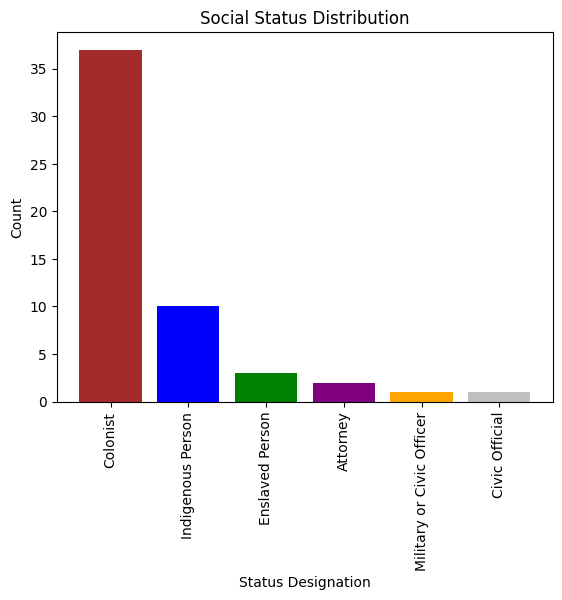

In [12]:
#graph the simple frequency of social statuses of the people in the records
from matplotlib import pyplot as plt #import module needed to plot data

gender_counts = person_no_nulls_df['gender'].value_counts() #use .value_counts() to tally the instances of each category
status_counts = person_no_nulls_df['status'].value_counts()

status_labels = ["Colonist", "Indigenous Person", "Enslaved Person", "Attorney", "Military or Civic Officer", "Civic Official"]
status_colors = ['brown', 'blue', 'green', 'purple', 'orange', 'silver']

#create the graph
plt.bar(status_labels, status_counts, color = status_colors)
plt.title("Social Status Distribution")
plt.xlabel("Status Designation")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


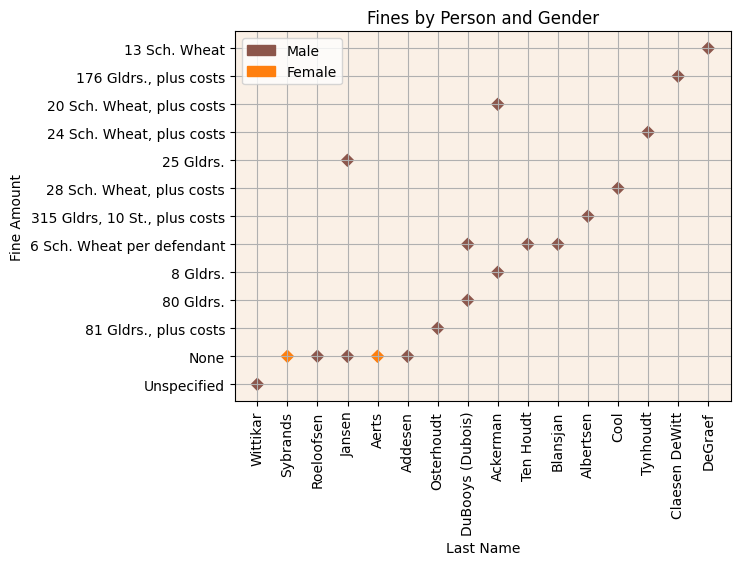

In [13]:
#graph the fines associated with defendants and color by gender

defendants_sorted = defendant_no_nulls_df.sort_values(by='amount', ascending=False) #can choose things other than amount if desired

x_vals = defendants_sorted.lname
y_vals = defendants_sorted.amount
colors = {'M': 'tab:brown', 'F': 'tab:orange'}
color_list = [colors[group] for group in defendants_sorted.gender]

plt.scatter(x_vals, y_vals, c=color_list, marker='D') #D sets marker to diamond shape
plt.title("Fines by Person and Gender")
plt.xlabel("Last Name")
plt.ylabel("Fine Amount")
plt.xticks(rotation=90)
plt.grid()

ax = plt.gca()
ax.set_facecolor("linen")

import matplotlib.patches as mpatches
legend_handles = [
    mpatches.Patch(color=colors['M'], label='Male'),
    mpatches.Patch(color=colors['F'], label='Female'), # add as many as needed
]
plt.legend(handles=legend_handles, loc='upper left')

plt.show()

In [14]:
#prepare information to create a graph of the name of each person by session using dataframes

session_ids = person_session_df['sessionDetailsID']
person_ids = person_session_df['personID']
first_names = person_no_nulls_df['fname']
last_names = person_no_nulls_df['lname']

#create lists of names using list comprehension
fnames = [name[1] for name in first_names.items()]
lnames = [name[1] for name in last_names.items()]

#use .zip() to associate first and last names correctly
names = list(zip(fnames, lnames))

#process zipped list to create proper full names
full_names = []

#could have created a function to do this earlier rather than repeating the code here
for name in names:
  first = name[0]
  last = name[1]
  if first == ' ':
      full_name = f'{last}'
  elif last == ' ':
      full_name = f'{first}'
  else:
      full_name = f'{first} {last}'

  full_names.append(full_name)

#set values used for graph
session_vals = [id[1] for id in person_ids.items()] #contains the person ID numbers from each session (this will be our x axis)
session_numbers = [id[1] for id in session_ids.items()] #contains the session ID numbers from each session (this will be our y axis)

#replace person IDs per session with full names
session_names = []
for item in session_vals:
  session_names.append(full_names[item-1]) #the index has an offset because the person ids run from 1-54 but the indexes in full_names run from 0-53


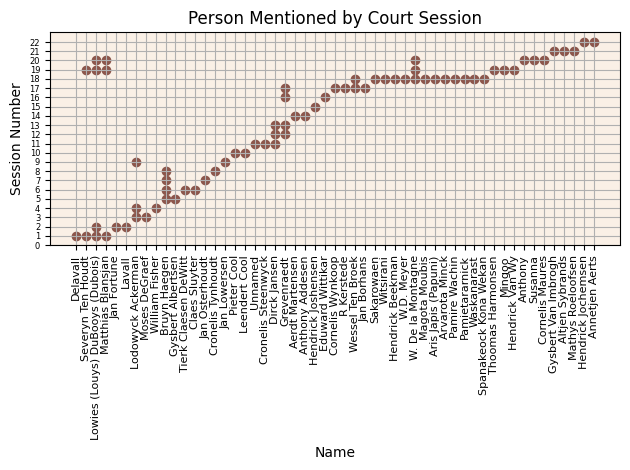

In [15]:
#create graph from preceeding work
import numpy as np #needed to help arrange y-ticks

plt.scatter(session_names, session_numbers, c='tab:brown')
plt.title("Person Mentioned by Court Session")
plt.xlabel("Name")
plt.ylabel("Session Number")
plt.xticks(rotation=90, size=8)
plt.yticks(np.arange(0, 23, 1), size=6) #arrange y-ticks so that all sessions have a line
plt.grid()
plt.tight_layout()
ax = plt.gca()
ax.set_facecolor("linen")
# plt.savefig("Person_by_Session.png", dpi=300) #save the file as a png for later use
plt.show()

In [16]:
#alternatively, we could also get the same list of names by referencing the dictionary we created earlier

combined_names = []

for entry in session_dict_names.values():
  for person in entry:
    combined_names.append(person[0])

print(len(combined_names))

72
